In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Keras Visualizer Library

###Keras Visualizer is an open-source python library that is really helpful in visualizing how your model is connected layer by layer

#Installing Keras Visualization
We will install Keras Visualization like any other python library using pip install. We will be using Google Collab for this article, so you need to copy the command given and run it in google collab to install the library.

##Let us visualize a convolutional neural network that will get us a better idea of how this library helps us in visualizing CNN’s

In [33]:
!pip3 install keras-visualizer


In [34]:
import keras
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras_visualizer import visualizer 
from keras import layers, models, layers  
from keras.models import Sequential, load_model, Model
from PIL import Image

In [35]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10))
model.summary() 
visualizer(model, filename='graph01', format='png', view=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 74, 74, 16)        1168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10368)            

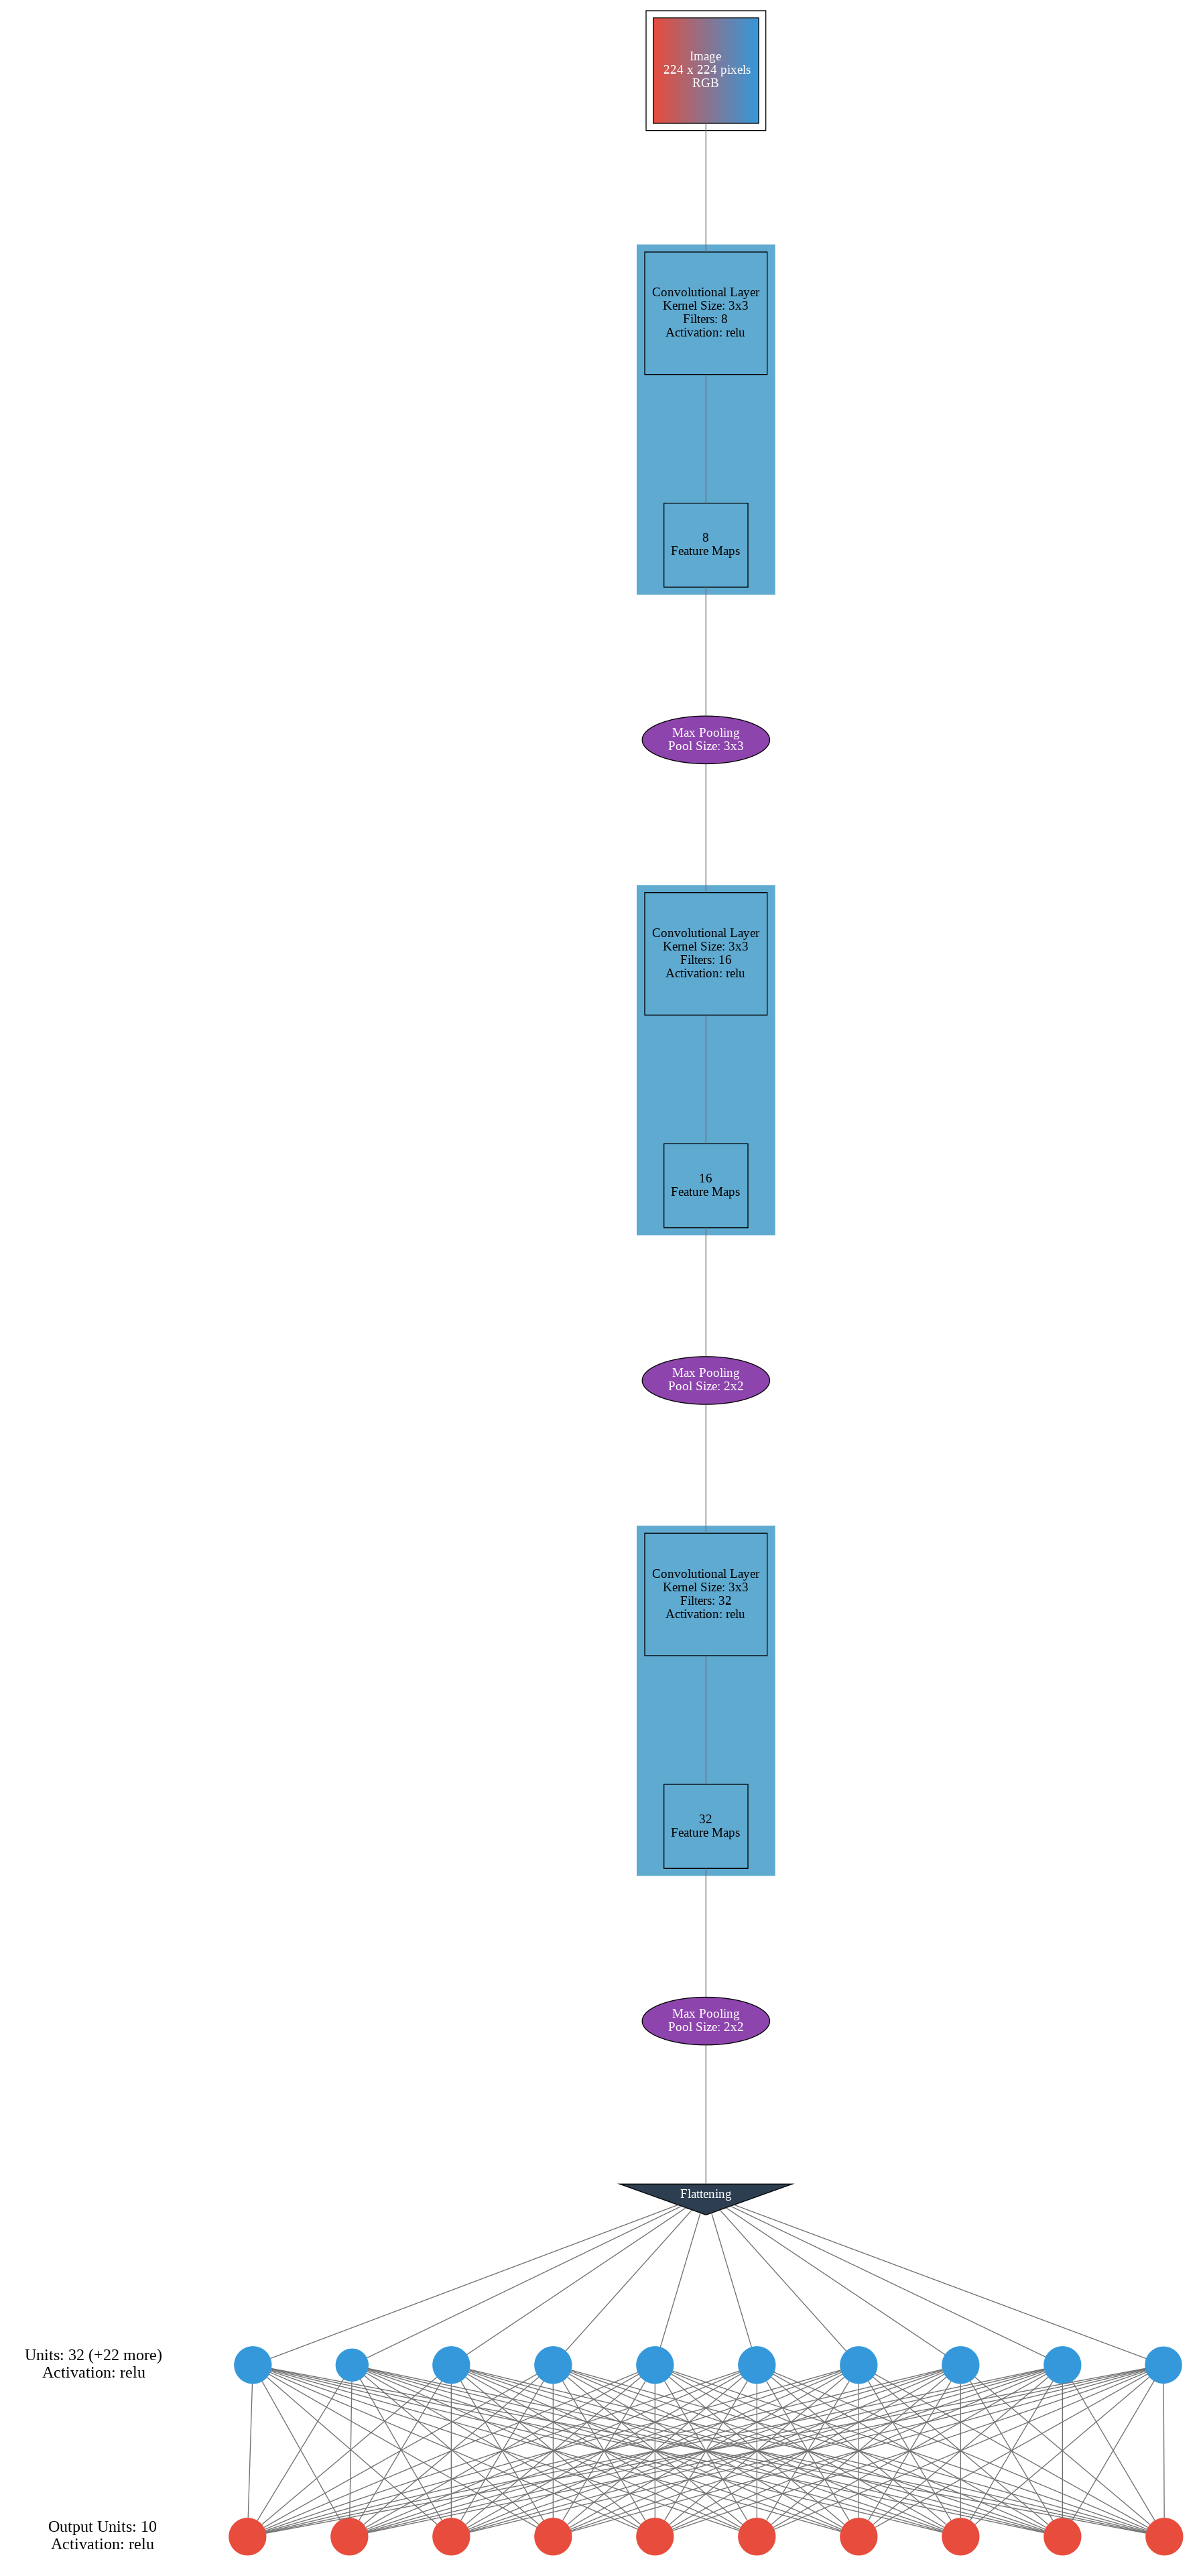

In [36]:
input_path='/content/graph01.png'
#read the image
im = Image.open(input_path)
#show image
im

In [37]:
#Example 2:
model = Sequential([  
    layers.Dense(64, activation='relu', input_shape=(8,)),  
    layers.Dense(6, activation='softmax'),  
    layers.Dense(32),  
    layers.Dense(9, activation='sigmoid')])  

visualizer(model, filename='graph02', format='png', view=True)

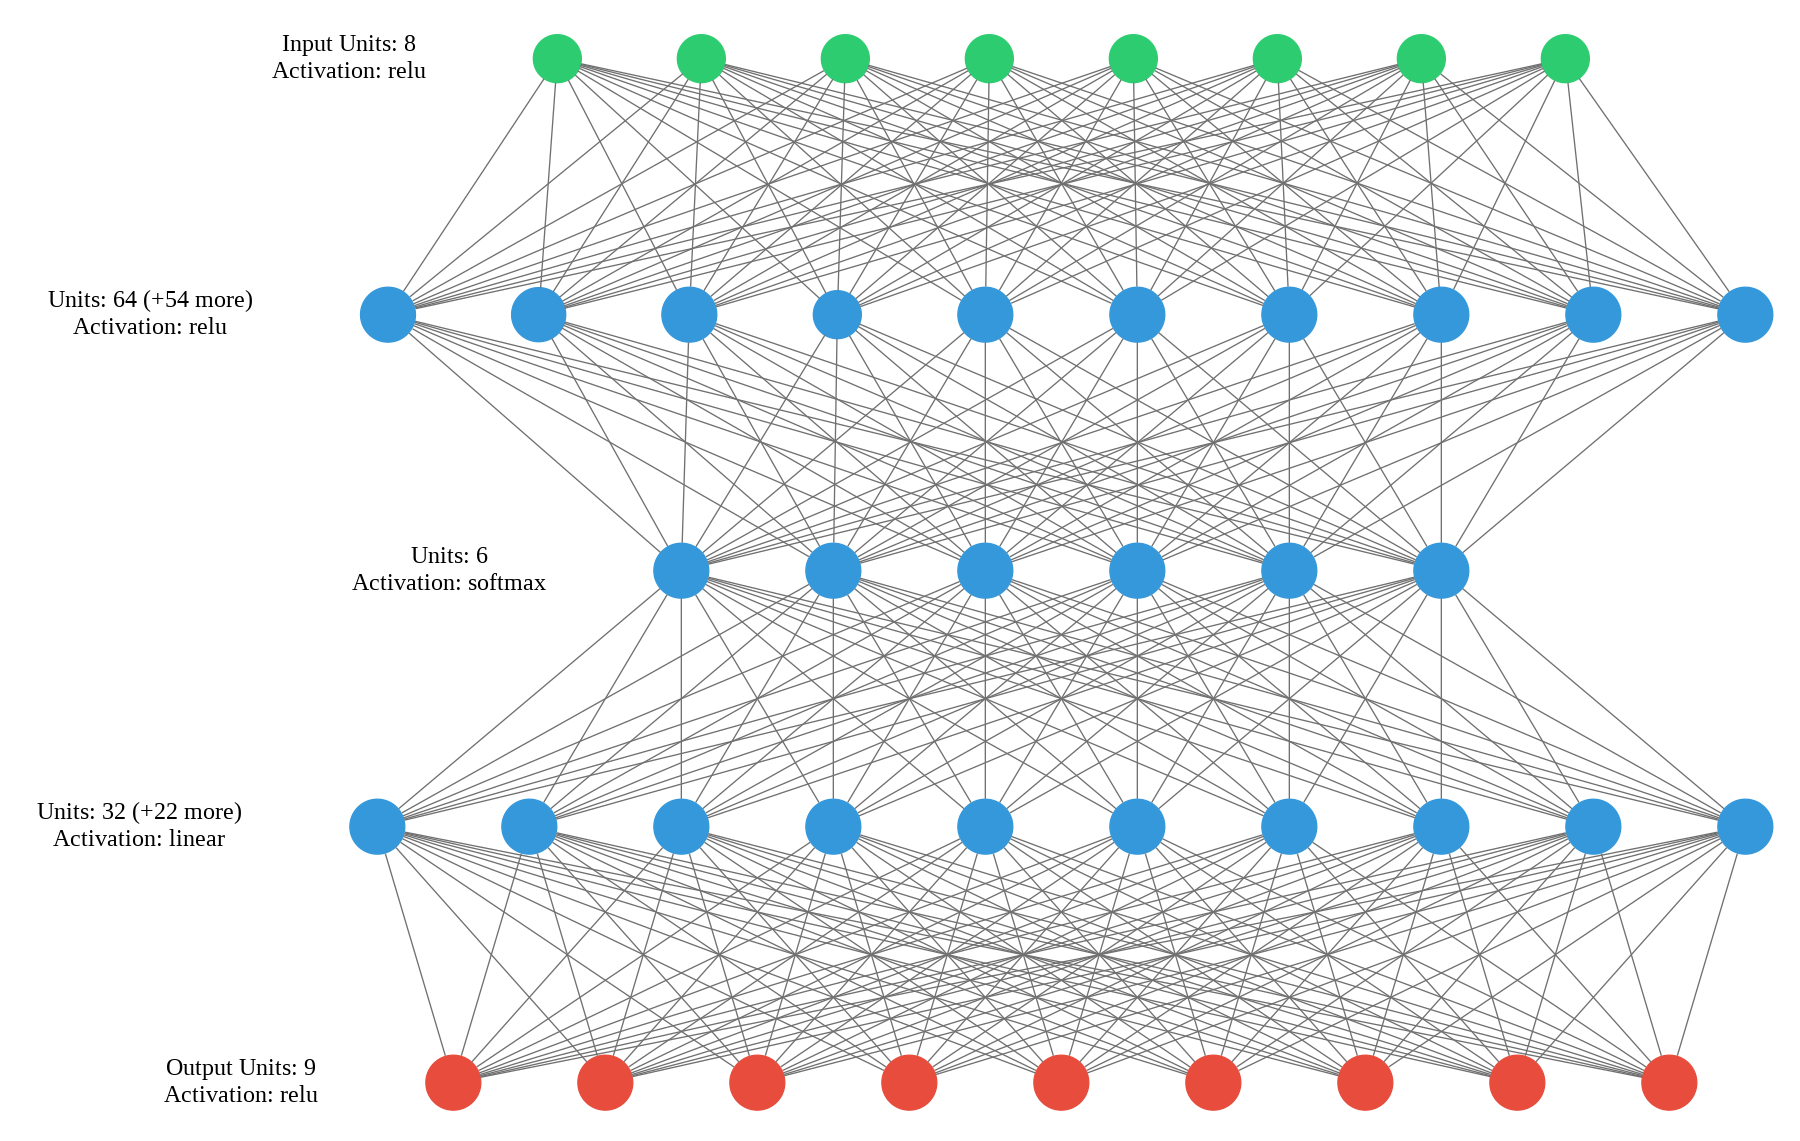

In [38]:
input_path='/content/graph02.png'
#read the image
im = Image.open(input_path)
#show image
im

In [72]:
'''# example 3
model_name = 'Tl_vgg19'
input_image_size = [224, 224]
vgg19_model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
    input_shape=(input_image_size[0],input_image_size[1],3))
x = vgg19_model.output
x = Flatten()(x)
x = Dense(1024,activation = 'relu')(x)
predict = Dense(10, activation = 'softmax')(x)
model = Model(inputs=vgg19_model.input, outputs=predict)
visualizer(model, filename='graph03', format='png', view=True)'''

"# example 3\nmodel_name = 'Tl_vgg19'\ninput_image_size = [224, 224]\nvgg19_model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', \n    input_shape=(input_image_size[0],input_image_size[1],3))\nx = vgg19_model.output\nx = Flatten()(x)\nx = Dense(1024,activation = 'relu')(x)\npredict = Dense(10, activation = 'softmax')(x)\nmodel = Model(inputs=vgg19_model.input, outputs=predict)\nvisualizer(model, filename='graph03', format='png', view=True)"

In [47]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [52]:
# load the model
model = VGG19()
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [53]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [54]:
!pwd

/content


In [57]:
input_img = "/content/gdrive/My Drive/Colab Notebooks/images_test/" + 'hb19379.jpeg' # bird.jpg

Feature map block 1


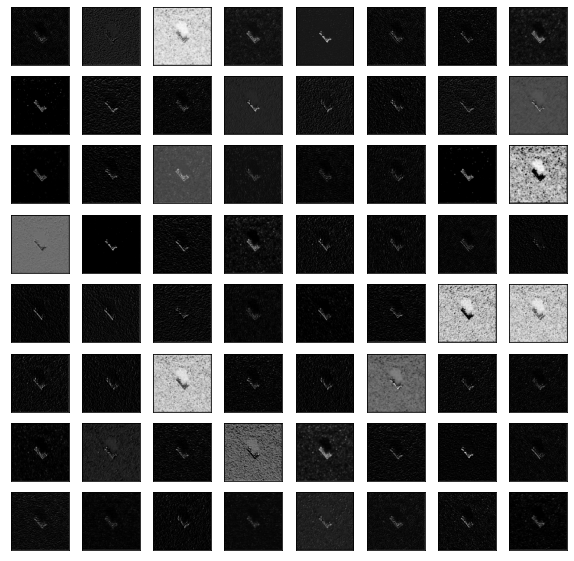

Feature map block 2


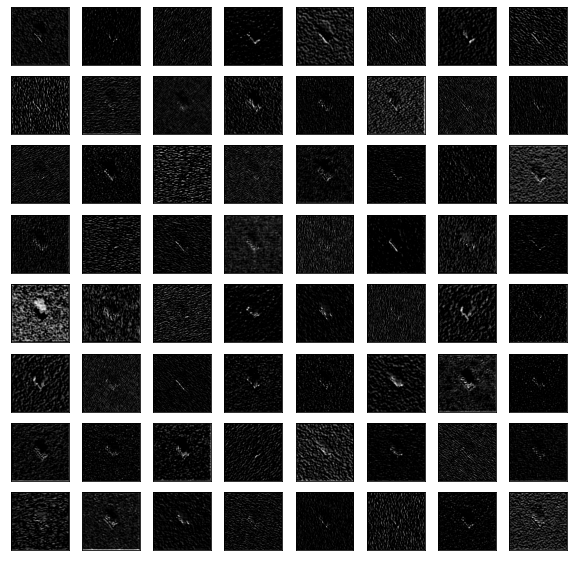

Feature map block 3


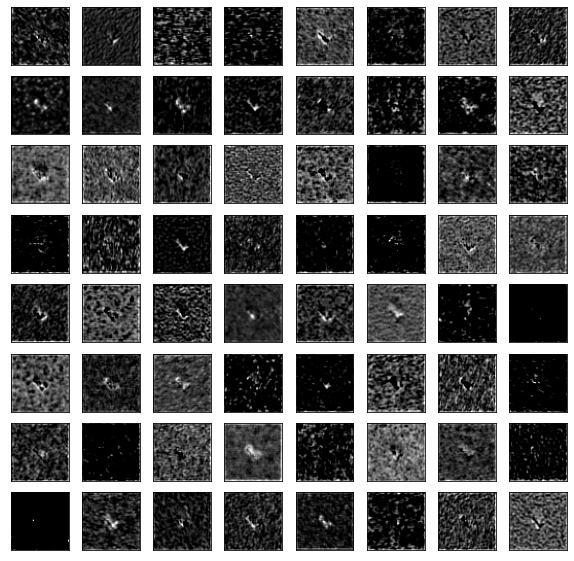

Feature map block 4


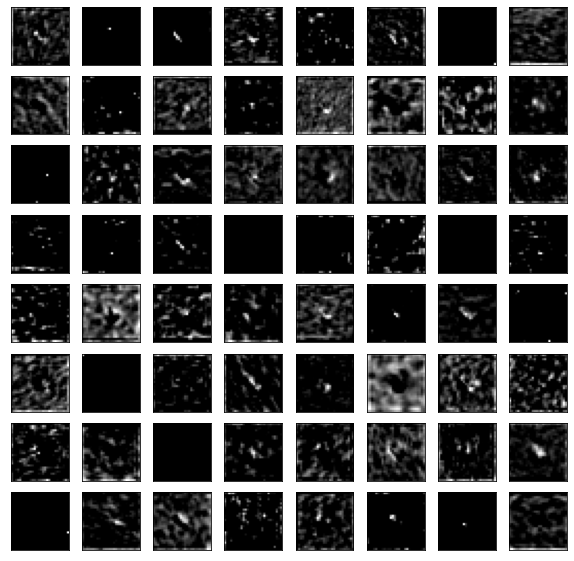

Feature map block 5


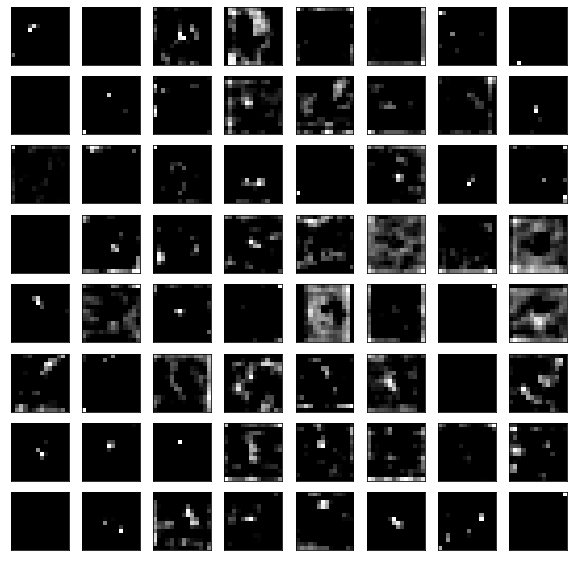

In [71]:
# src = https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

# load the image with the required shape
img = load_img(input_img, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for i, fmap in enumerate(feature_maps):
  pyplot.figure(figsize=(10,10))
  print(f'Feature map block {i+1}')
  # plot all 64 maps in an 8x8 squares
  ix = 1
  for _ in range(square):
    for _ in range(square):
      # specify subplot and turn of axis
      ax = pyplot.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      #pyplot.imshow(fmap[0, :, :, ix-1])
      ix += 1
  # show the figure
  pyplot.show()